In [13]:
from pathlib import Path
import snap
import pandas as pd


import numpy as np
import scipy
from matplotlib import pyplot as plt
import seaborn as sns
import math

In [6]:
data_file = Path.home()/'data/cs224w/wiki-Vote.txt'

## 1 Analyzing the Wikipedia voters network [27 points]
### GSmall

In [7]:
G = snap.TNGraph.New()
G.AddNode(1)
G.AddNode(2)
G.AddNode(3)

G.AddEdge(1,2)
G.AddEdge(2,1)
G.AddEdge(1,3)
G.AddEdge(1,1)

print(f'1. num of nodes: {G.GetNodes()}')

# self loops
num_self_loops = 0
for node in G.Nodes():
    if G.IsEdge(node.GetId(),node.GetId()):
        num_self_loops += 1
print(f'2. num self loops: {num_self_loops}')

# number of directed edges
num_dir_edges = 0
for edge in G.Edges():
    if edge.GetSrcNId() != edge.GetDstNId():
        num_dir_edges += 1
print(f'3. num directed edges - {num_dir_edges}')

# number of undirected edges
num_undir_edges = 0
num_reciprocated_edges = 0
for edge in G.Edges():
    if edge.GetSrcNId() == edge.GetDstNId():
        continue
    num_undir_edges += 1
        
    if G.IsEdge(edge.GetDstNId(),edge.GetSrcNId()):
        num_reciprocated_edges += 1

# reduce the repeated edges
num_undir_edges -= num_reciprocated_edges/2
print(f'4. num undir edges: {num_undir_edges}')
print(f'5. num reciprocated edges: {num_reciprocated_edges/2}')

# The number of nodes of zero out-degree.
num_out_deg_zero = 0
num_in_deg_zero = 0
num_out_deg_gt_ten = 0
num_in_deg_le_ten = 0
for node in G.Nodes():
    if node.GetOutDeg() == 0:
        num_out_deg_zero += 1
        
    if node.GetInDeg() == 0:
        num_in_deg_zero += 1
        
    if node.GetOutDeg() > 10:
        num_out_deg_gt_ten += 1
        
    if node.GetInDeg() < 10:
        num_in_deg_le_ten += 1
print(f'6. The number of nodes of zero out-degree - {num_out_deg_zero}')
print(f'7. The number of nodes of zero in-degree - {num_in_deg_zero}')
print(f'8. The number of nodes with more than 10 outgoing edges - {num_out_deg_gt_ten}')
print(f'9. The number of nodes with fewer than 10 incoming edges - {num_in_deg_le_ten}')

1. num of nodes: 3
2. num self loops: 1
3. num directed edges - 3
4. num undir edges: 2.0
5. num reciprocated edges: 1.0
6. The number of nodes of zero out-degree - 1
7. The number of nodes of zero in-degree - 0
8. The number of nodes with more than 10 outgoing edges - 0
9. The number of nodes with fewer than 10 incoming edges - 3


### Wiki Vote

In [8]:
# read data
df = pd.read_csv(data_file, sep='\t', skiprows=4, header=None)
df.columns = ['FromNodeId', 'ToNodeId']

# create graph
G = snap.TNGraph.New()
for r in df.itertuples():
    if not G.IsNode(r.FromNodeId):
        G.AddNode(r.FromNodeId)
    if not G.IsNode(r.ToNodeId):
        G.AddNode(r.ToNodeId)
        
    G.AddEdge(r.FromNodeId,r.ToNodeId)

print(f'1. num of nodes: {G.GetNodes()}')

# self loops
num_self_loops = 0
for node in G.Nodes():
    if G.IsEdge(node.GetId(),node.GetId()):
        num_self_loops += 1
print(f'2. num self loops: {num_self_loops}')

# number of directed edges
num_dir_edges = 0
for edge in G.Edges():
    if edge.GetSrcNId() != edge.GetDstNId():
        num_dir_edges += 1
print(f'3. num directed edges - {num_dir_edges}')

# number of undirected edges
num_undir_edges = 0
num_reciprocated_edges = 0
for edge in G.Edges():
    if edge.GetSrcNId() == edge.GetDstNId():
        continue
    num_undir_edges += 1
        
    if G.IsEdge(edge.GetDstNId(),edge.GetSrcNId()):
        num_reciprocated_edges += 1

# reduce the repeated edges
num_undir_edges -= num_reciprocated_edges/2
print(f'4. num undir edges: {num_undir_edges}')
print(f'5. num reciprocated edges: {num_reciprocated_edges/2}')

# The number of nodes of zero out-degree.
num_out_deg_zero = 0
num_in_deg_zero = 0
num_out_deg_gt_ten = 0
num_in_deg_le_ten = 0
for node in G.Nodes():
    if node.GetOutDeg() == 0:
        num_out_deg_zero += 1
        
    if node.GetInDeg() == 0:
        num_in_deg_zero += 1
        
    if node.GetOutDeg() > 10:
        num_out_deg_gt_ten += 1
        
    if node.GetInDeg() < 10:
        num_in_deg_le_ten += 1
print(f'6. The number of nodes of zero out-degree - {num_out_deg_zero}')
print(f'7. The number of nodes of zero in-degree - {num_in_deg_zero}')
print(f'8. The number of nodes with more than 10 outgoing edges - {num_out_deg_gt_ten}')
print(f'9. The number of nodes with fewer than 10 incoming edges - {num_in_deg_le_ten}')

1. num of nodes: 7115
2. num self loops: 0
3. num directed edges - 103689
4. num undir edges: 100762.0
5. num reciprocated edges: 2927.0
6. The number of nodes of zero out-degree - 1005
7. The number of nodes of zero in-degree - 4734
8. The number of nodes with more than 10 outgoing edges - 1612
9. The number of nodes with fewer than 10 incoming edges - 5165


## Further Analyzing the Wikipedia voters network [33 points]

In [15]:
degrees = [node.GetOutDeg() for node in G.Nodes()]

In [30]:
df = pd.Series(degrees,name='deg').value_counts().reset_index().rename(columns={'index':'deg','deg':'count'})
df = df[df.deg > 0]
print(df.shape)
df.head()

(237, 2)


,deg,count
0,1,2382
2,2,704
3,3,401
4,4,279
5,5,162


In [32]:
df['deg_log'] = np.log10(df['deg'])
df['count_log'] = np.log10(df['count'])

In [40]:
ax.get_xticklabels()[6]

Text(6, 0, '0.8450980400142568')

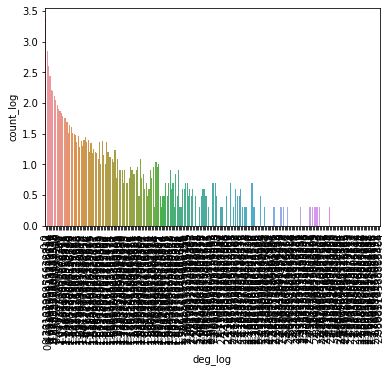

In [38]:
ax = sns.barplot(x='deg_log',y='count_log',data=df)
o = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [44]:
p = np.polyfit(df['deg_log'],df['count_log'],deg=1)
p

array([-1.28106471,  3.1324547 ])

In [45]:
a = p[0]
b = 1

## Finding Experts on the Java Programming Language on StackOverflow [40 points]

In [50]:
!head -n 3 stackoverflow-Java.txt

78	86
58	35
122	122


In [62]:
df = pd.read_csv('stackoverflow-Java.txt',sep='\t',header=None)
df.columns = ['endorser','answerer']
print(df.shape)
df.head(3)

(358867, 2)


,endorser,answerer
0,78,86
1,58,35
2,122,122


In [63]:
# create graph
G = snap.TNGraph.New()
for r in df.itertuples():
    if not G.IsNode(r.endorser):
        G.AddNode(r.endorser)
    if not G.IsNode(r.answerer):
        G.AddNode(r.answerer)
        
    G.AddEdge(r.endorser,r.answerer)

In [76]:
components = snap.TCnComV()
snap.GetWccs(G, components)
count = 0
print('no of weakly connected components - ', len(components))

no of weakly connected components -  10143


In [80]:
largest_wcc = snap.GetMxWcc(G)
print(f'No of nodes in largest wcc {largest_wcc.GetNodes()}')
print(f'No of edges in largest wcc {largest_wcc.GetEdges()}')

No of nodes in largest wcc 131188
No of edges in largest wcc 322486


In [86]:
PRankH = snap.TIntFltH()
snap.GetPageRank(G, PRankH)
for idx, item in enumerate(PRankH):
    if idx > 2:
        break
    print(item, PRankH[item])

78 2.4082266411394174e-06
86 1.0954090787330643e-05
58 2.7410854878087346e-06


In [92]:
slist = sorted(PRankH, key=lambda key:PRankH[key], reverse=True)
print('3. IDs of the top 3 most central nodes in the network by PagePank scores: ', slist[:3])

IDs of the top 3 most central nodes in the network by PagePank scores:  [992484, 135152, 22656]


In [94]:
NIdHubH = snap.TIntFltH()
NIdAuthH = snap.TIntFltH()
snap.GetHits(G, NIdHubH, NIdAuthH)

slist = sorted(NIdAuthH, key = lambda key: NIdAuthH[key], reverse = True)
print('4. IDs of the top 3 hubs and top 3 authorities in the network by HITS scores: ', slist[:3])

4. IDs of the top 3 hubs and top 3 authorities in the network by HITS scores:  [22656, 157882, 571407]
